<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/notebook/Keras_6_1_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 多元分類

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
from numpy.random import randn
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
np.random.seed(7)  # 指定亂數種子
target_mapping = {"setosa": 0,
          "versicolor": 1,
          "virginica": 2}


In [3]:
# 載入資料集
df = pd.read_csv("./iris_data.csv")
print(df.head)

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width     target
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>


In [4]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


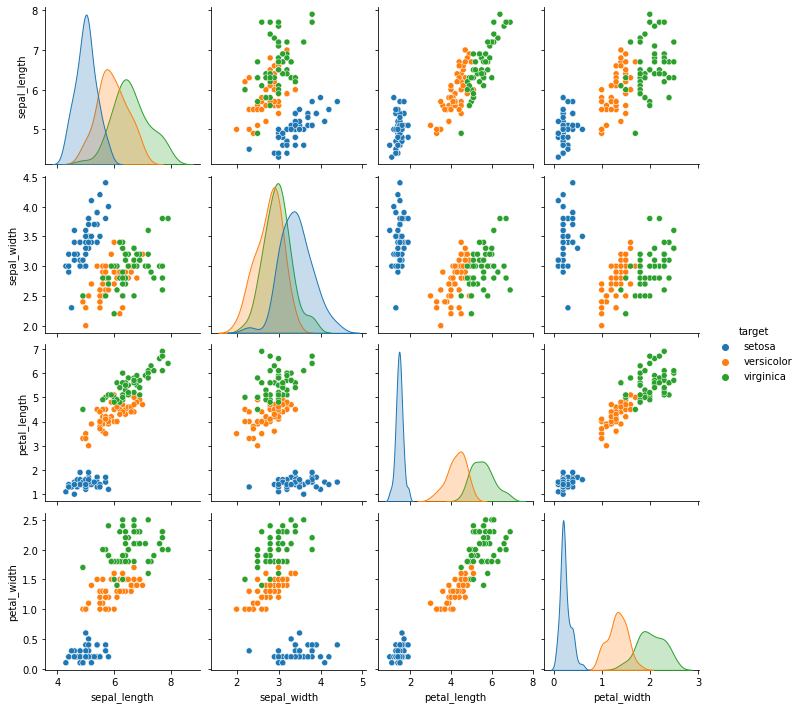

In [5]:
import seaborn as sns
sns.pairplot(df, hue="target")

In [6]:
df["target"] = df["target"].map(target_mapping)
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料

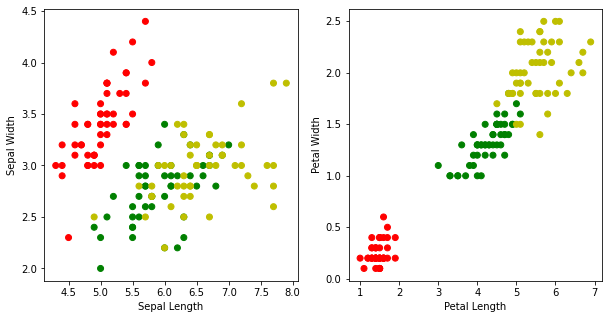

In [9]:
# 使用Matplotlib顯示視覺化圖表
colmap = np.array(["r", "g", "y"])
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.subplots_adjust(hspace = .5)
plt.scatter(df["sepal_length"], df["sepal_width"], color=colmap[df["target"]])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.subplot(1, 2, 2)
plt.scatter(df["petal_length"], df["petal_width"], color=colmap[df["target"]])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [10]:
# 分割成特徵資料和標籤資料
X = dataset[:,0:4].astype(float)
Y = to_categorical(dataset[:,4])
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)

In [12]:
# 分割成訓練和測試資料集
X_train, Y_train = X[:120], Y[:120]     # 訓練資料前120筆
X_test, Y_test = X[120:], Y[120:]       # 測試資料後30筆

In [13]:
# 建立Keras的Sequential模型
model = Sequential()
model.add(Dense(6, input_shape=(4,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()   # 顯示模型摘要資訊

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 21        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [16]:
# 訓練模型
print("Training ...")
model.fit(X_train, Y_train, epochs=100, batch_size=5)

Training ...
Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 1.2252 - accuracy: 0.4750
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1523 - accuracy: 0.4750
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0857 - accuracy: 0.4667
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0179 - accuracy: 0.4333
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9499 - accuracy: 0.4500
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8889 - accuracy: 0.4667
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8281 - accuracy: 0.6167
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7771 - accuracy: 0.6917
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7317 - accuracy: 0.7083
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.7

In [17]:
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("準確度 = {:.2f}".format(accuracy))


Testing ...
準確度 = 0.90


In [18]:
# 儲存Keras模型
print("Saving Model: iris.h5 ...")
model.save("iris.h5")

Saving Model: iris.h5 ...


In [19]:
# 計算分類的預測值
print("\nPredicting ...")
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
print(y_pred)
Y_target = dataset[:,4][120:].astype(int)
print(Y_target)


Predicting ...
[[1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]
[0 1 1 2 2 1 2 0 1 1 0 0 0 1 1 0 2 2 1 2 0 2 1 1 0 2 1 2 1 0]


In [20]:
print(len(y_pred),len(Y_target))

30 30
